Taller 2
1.	Usando el fichero estacional.xls. Realiza los modelos Realiza x11 en Excel suponiendo que la serie es trimestre y multiplicativa. Responde a las siguientes preguntas.

a.	¿Cómo es la Tendencia de la serie?

b.	¿Cuáles es el mejor trimestre la serie? ¿Y el peor?

c.	¿Qué componente irregular tiene la primera observación?

d.	¿Cómo es la serie desestacionalizada para el trimestre 2 del segundo año?

2.	Usando el fichero Simul.xls de clase realiza la metodología Box-Jenkins para las series Y2, Y3, Y4, Y5, Y8. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [8]:
df = pd.read_csv('C:/Users/Lenovo/Programacion/Python/BBDD/Simul.csv', sep=',')
df

,Y,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9
0,2.298704,-2.882500,6.560133,-3.342531,-18.681190,1.566716,2.839575,42.71518,0.472623,-3.284886
1,6.371003,-2.329862,6.149235,-3.827409,-14.458870,1.232620,0.560095,43.38689,1.796142,-2.929823
2,8.664033,-0.558244,7.563736,0.667583,-5.830734,0.902619,2.357468,42.38133,1.937842,-3.015838
3,14.284040,-0.032516,6.878902,6.326529,-9.052034,1.012924,12.296400,45.32782,4.018603,-0.281425
4,14.629540,0.673623,5.117408,3.381252,-8.825809,0.122384,2.479474,41.56980,3.209945,1.422424
...,...,...,...,...,...,...,...,...,...,...
145,142.156600,-1.688061,-2.911496,-8.048311,1.149846,-0.891185,-21.417770,155.15730,-4.484021,11.097560
146,144.482100,-1.337042,-1.090171,-3.547081,2.413582,-0.379045,1.536026,157.52700,-3.692576,7.997402
147,146.122500,-0.752804,-0.780718,3.015561,-3.219302,1.723191,4.098501,159.21330,-2.373507,14.906390
148,147.037400,1.563594,-0.699471,0.078544,-8.759682,1.272473,-25.400260,161.37090,-1.692219,13.498140


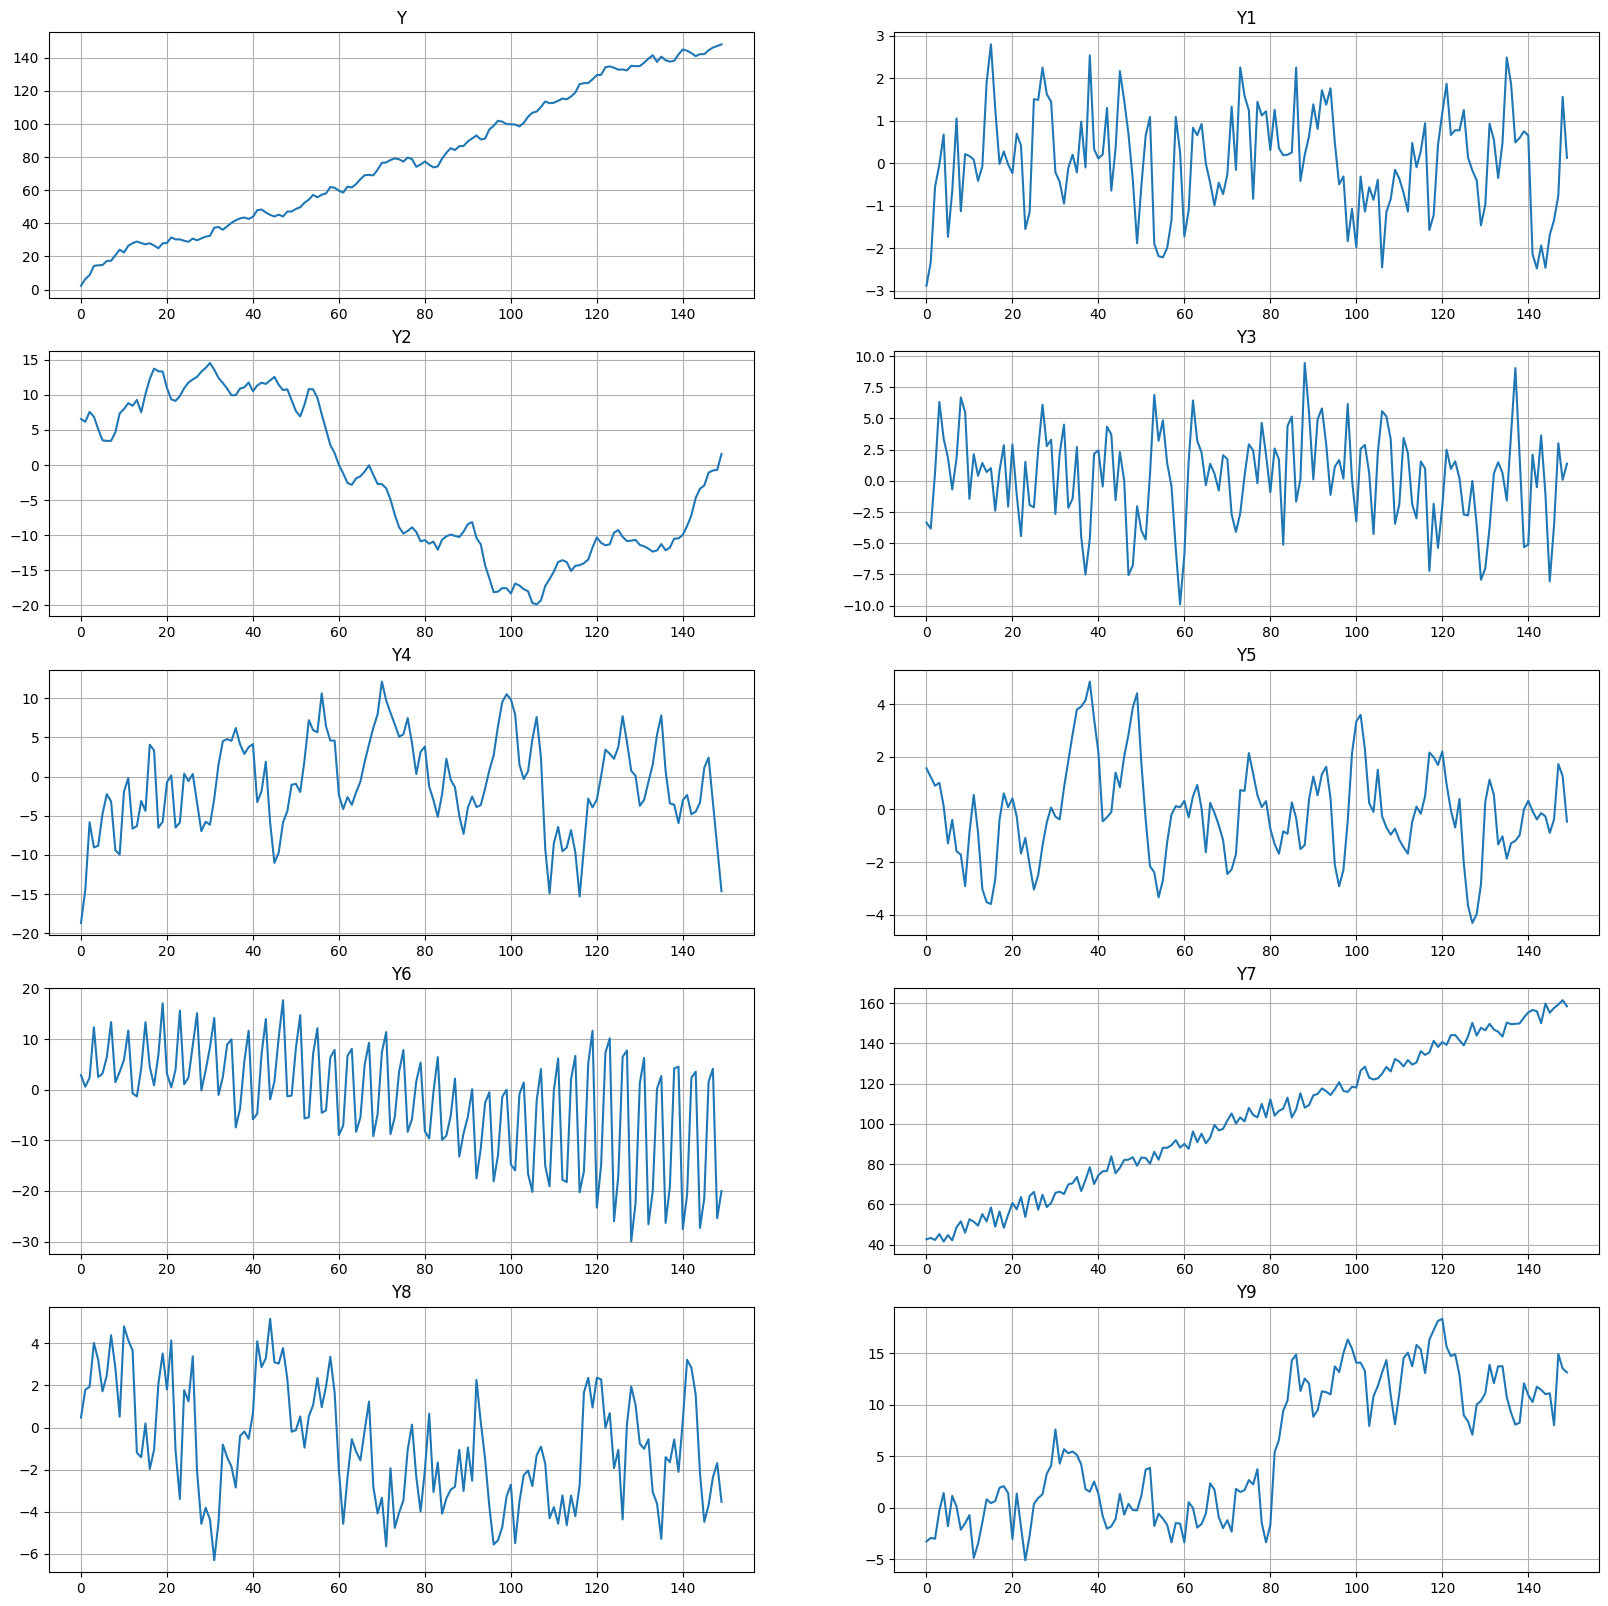

In [20]:
fig = plt.figure(figsize=(20, 20))
for i, sc in enumerate(df):
    fig.add_subplot(5, 2, i+1)
    ax = df[sc].plot(kind='line')
    ax.set_ylabel("")
    ax.set_title(sc)
    ax.grid()

In [25]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
for i in df:
    result=adfuller(df[i].dropna())
    print(f'ADF Statistic,{i}: {result[0]:.6f}')
    print(f'p-value, {i}: {result[1]:.6f}')

ADF Statistic,Y: -0.713221
p-value, Y: 0.843295
ADF Statistic,Y1: -7.104006
p-value, Y1: 0.000000
ADF Statistic,Y2: -1.150434
p-value, Y2: 0.694546
ADF Statistic,Y3: -5.986194
p-value, Y3: 0.000000
ADF Statistic,Y4: -3.779561
p-value, Y4: 0.003123
ADF Statistic,Y5: -5.861957
p-value, Y5: 0.000000
ADF Statistic,Y6: -0.878888
p-value, Y6: 0.794845
ADF Statistic,Y7: -0.489960
p-value, Y7: 0.893961
ADF Statistic,Y8: -4.882765
p-value, Y8: 0.000038
ADF Statistic,Y9: -2.136947
p-value, Y9: 0.229920


- p-value > 0.05 es No Estacionaria
- p-value < 0.05 es Estacionaria

- Y2 = 0.694 La serie es No estacionaria
- Y3 = 0.000 La serie es estacionaria
- Y4 = 0.003 La serie es estacionaria
- Y5 = 0.000 La serie es estacionaria
- Y8 = 0.000 La Serie es estacionaria

# Y2

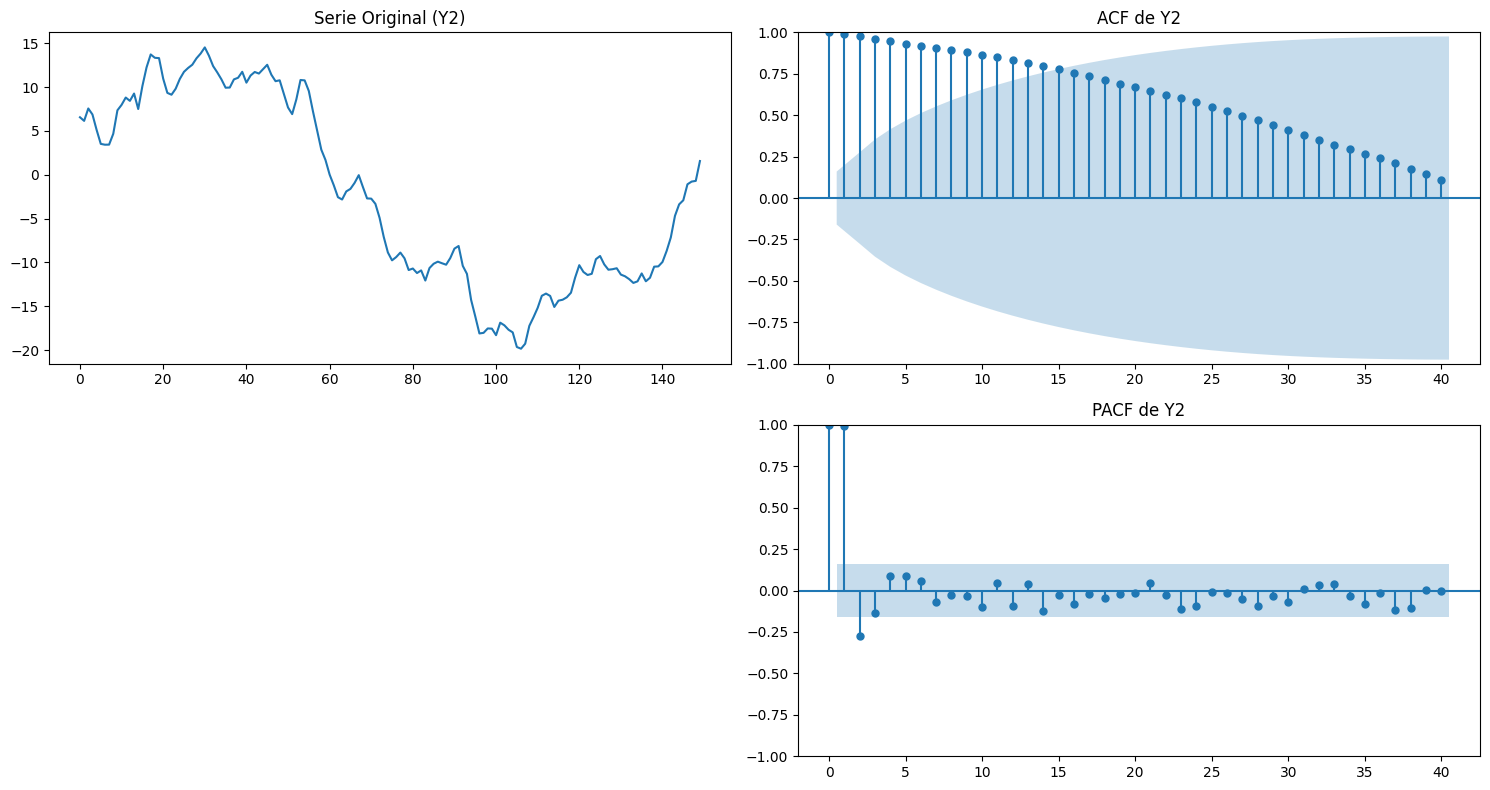

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Crear una figura para ACF (FACT) y PACF (FACP)
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=False)

# Graficar la serie original
axes[0, 0].plot(df.Y2)
axes[0, 0].set_title('Serie Original (Y2)')

# Graficar ACF
plot_acf(df.Y2, ax=axes[0, 1], lags=40)
axes[0, 1].set_title('ACF de Y2')

# Graficar PACF
plot_pacf(df.Y2, ax=axes[1, 1], lags=40)
axes[1, 1].set_title('PACF de Y2')

# Quitar gráfico vacío
fig.delaxes(axes[1, 0])

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Modelo Paseo aleatorio ya que ACF decrece lento y PACF decrece rapido tiene mas de un valor significativo, para poder determinar si que modelo debemos tomar, debemos de realizar una diferecniacion para ello, graficamos la serie anterior diferenciada y volvemos a relizar el teste de Dickey Fuller

1 serie diferenciada


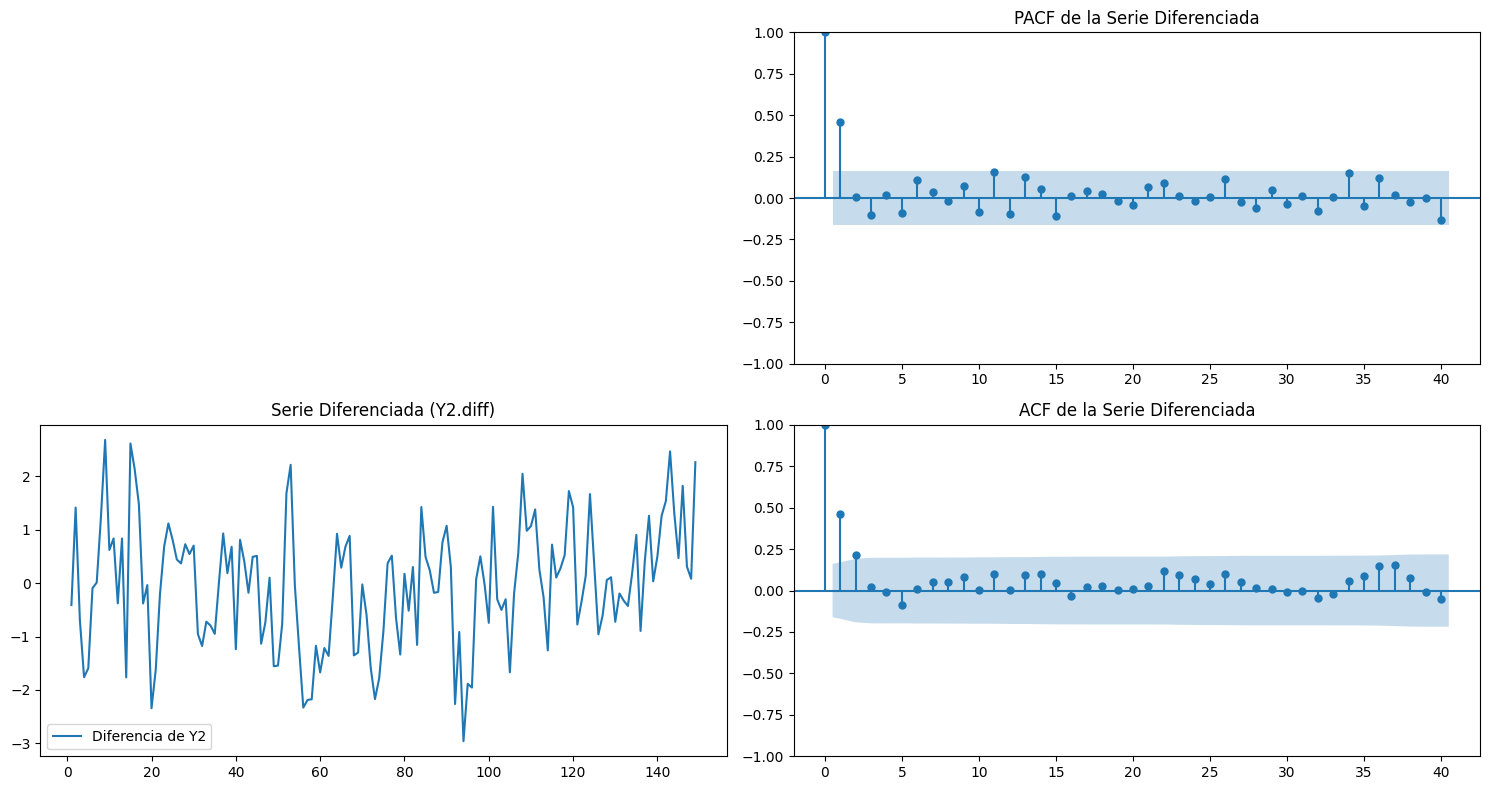

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar la diferencia de la serie original, ACF y PACF
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=False)

# Gráfico de la serie diferenciada
axes[1, 0].plot(df.Y2.diff(), label='Diferencia de Y2')
axes[1, 0].set_title('Serie Diferenciada (Y2.diff)')
axes[1, 0].legend()

# ACF de la serie diferenciada
plot_acf(df.Y2.diff().dropna(), ax=axes[1, 1], lags=40)
axes[1, 1].set_title('ACF de la Serie Diferenciada')

# PACF de la serie diferenciada
plot_pacf(df.Y2.diff().dropna(), ax=axes[0, 1], lags=40)
axes[0, 1].set_title('PACF de la Serie Diferenciada')

# Quitar gráfico vacío
fig.delaxes(axes[0, 0])

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Testeamos con ADFuller  de nuevo a nuetsra serie diferenciada para ver si nuestra seria es estacionaria o no p value =  < 0.05

De acuerdo a esto nuestra serie es estacionaria y es del modelo ARIMA (p,q)
- ACF decrece rapido
- PACF decrece rapido

In [37]:
#nuevo df Y2
result=adfuller(df.Y2.diff().dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

ADF Statistic: -7.101717
p-value:0.000000


In [39]:
#arima model (1,1,0)
from statsmodels.tsa.arima.model import ARIMA
modelo_y = ARIMA(df.Y2, order=(1, 1, 0))  
resultados = modelo_y.fit() 
print (resultados.summary())

                               SARIMAX Results                                
Dep. Variable:                     Y2   No. Observations:                  150
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -213.489
Date:                Sun, 03 Nov 2024   AIC                            430.978
Time:                        19:57:59   BIC                            436.986
Sample:                             0   HQIC                           433.419
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4707      0.079      5.987      0.000       0.317       0.625
sigma2         1.0264      0.115      8.914      0.000       0.801       1.252
Ljung-Box (L1) (Q):                   0.00   Jarque-

En este aprtado debemos fijarnos>
- Prob(Q) debe ser mayor > 0.05 
- Ljung-Box = los residuos son ruido blanco y ya es estacionaria


In [40]:
# Realizar el test de Ljung-Box para los residuos del modelo ARIMA
#poner python y hacerlo en consola
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resultados.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,12.577929,0.248237


Como p-value es mayor a > 0.05 podemos decir nuestro modelo seleccionado esta correcto.

Si p-value es menor < a 0.05 nuestro modelo esta mal seleccionado

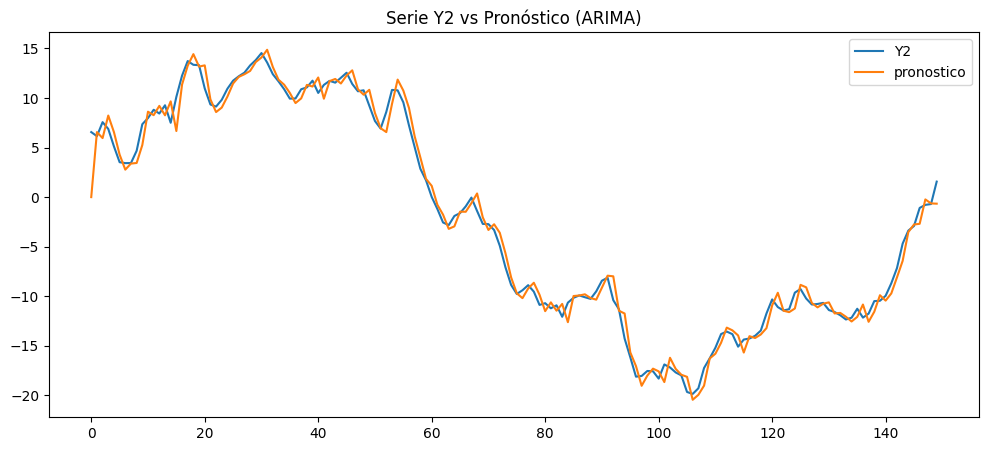

In [41]:
#predicción:  Agregar los valores ajustados y graficar
df['pronostico'] = resultados.fittedvalues
df[['Y2', 'pronostico']].plot(figsize=(12, 5), title="Serie Y2 vs Pronóstico (ARIMA)")
plt.show()

-----------------------

# Y3

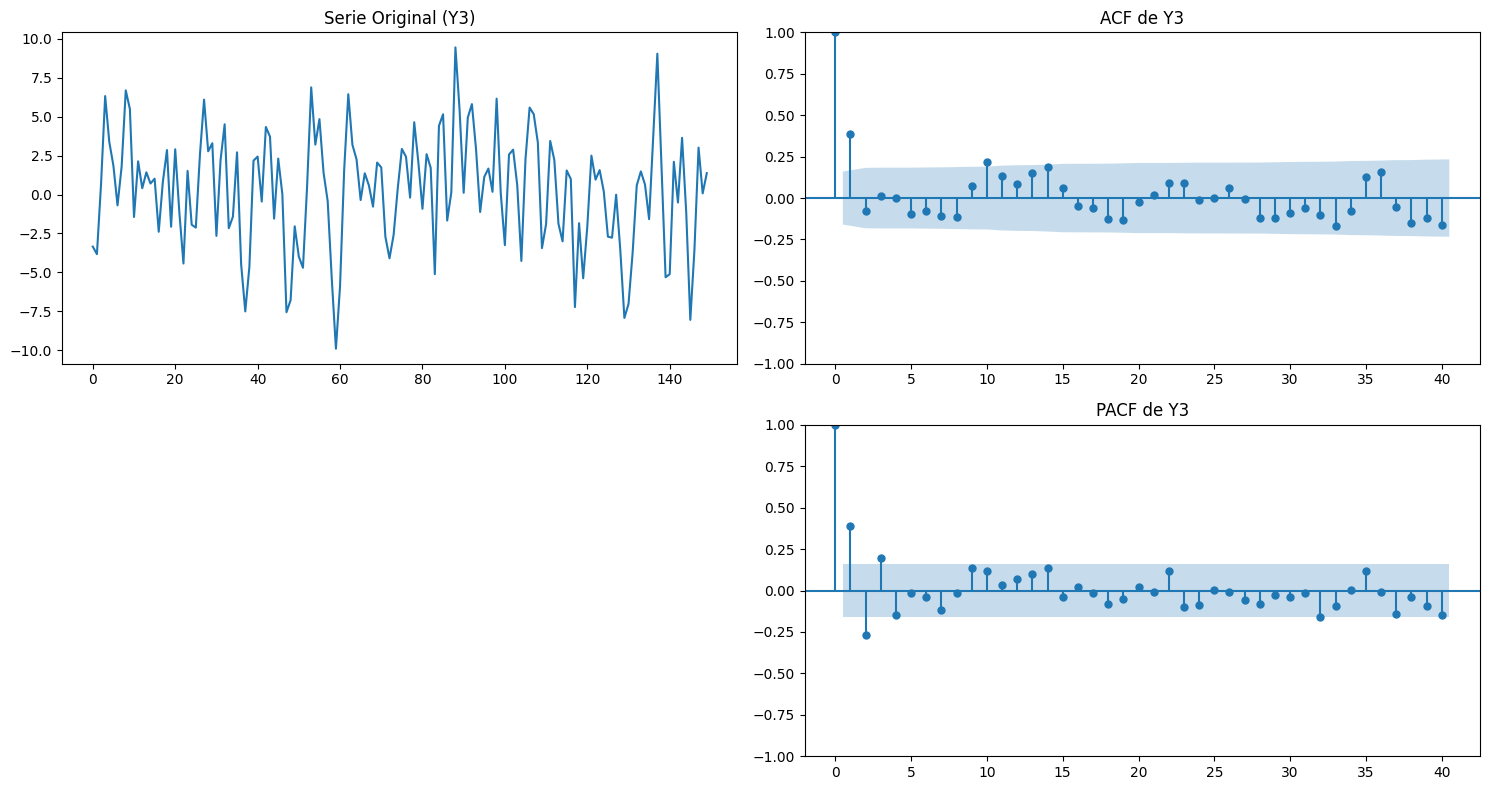

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Crear una figura para ACF (FACT) y PACF (FACP)
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=False)

# Graficar la serie original
axes[0, 0].plot(df.Y3)
axes[0, 0].set_title('Serie Original (Y3)')

# Graficar ACF
plot_acf(df.Y3, ax=axes[0, 1], lags=40)
axes[0, 1].set_title('ACF de Y3')

# Graficar PACF
plot_pacf(df.Y3, ax=axes[1, 1], lags=40)
axes[1, 1].set_title('PACF de Y3')

# Quitar gráfico vacío
fig.delaxes(axes[1, 0])

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Es un modelo ARMA ya que:
- ACF decrece rapido
- PACF decrece rapido

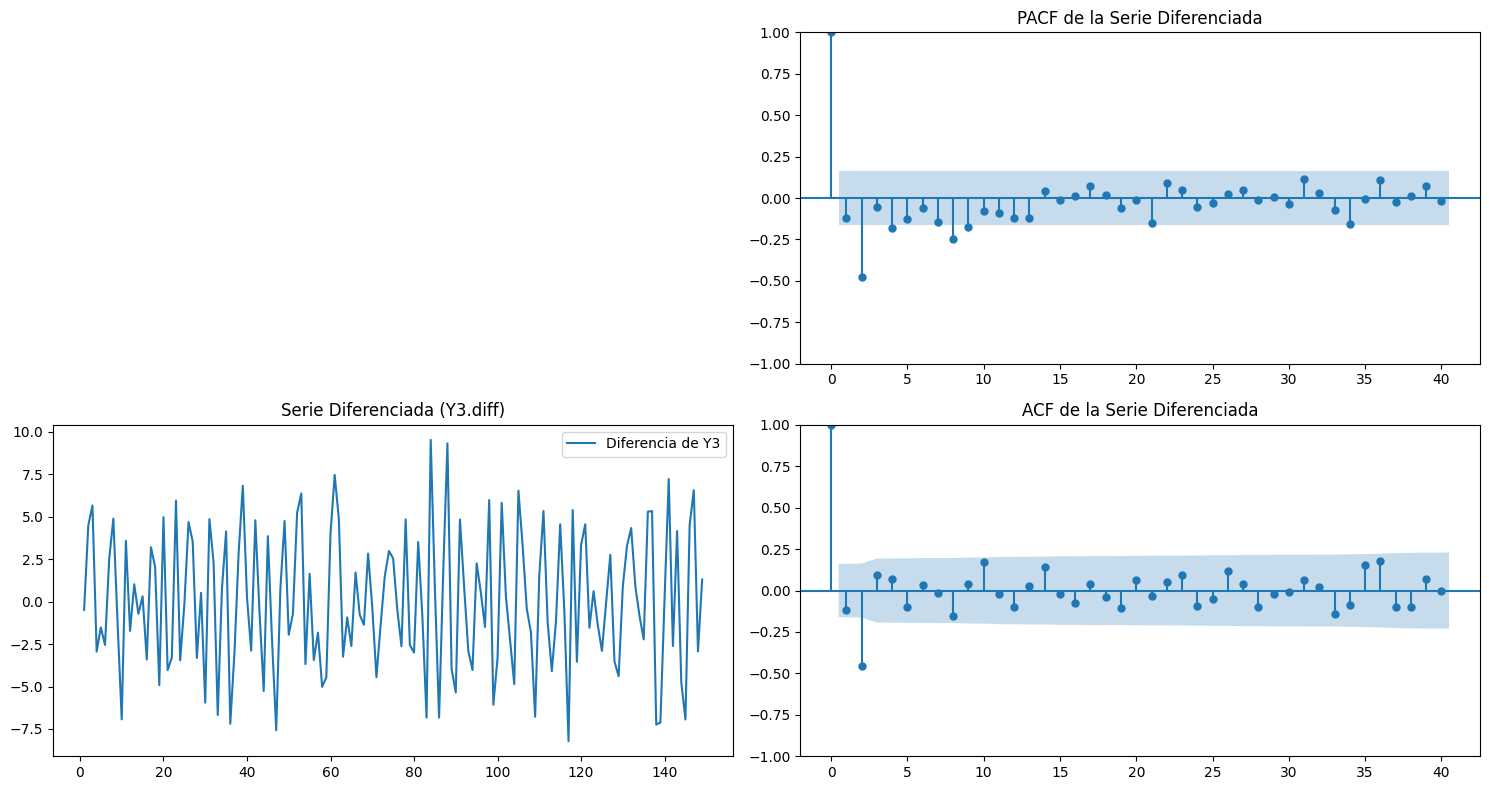

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar la diferencia de la serie original, ACF y PACF
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=False)

# Gráfico de la serie diferenciada
axes[1, 0].plot(df.Y3.diff(), label='Diferencia de Y3')
axes[1, 0].set_title('Serie Diferenciada (Y3.diff)')
axes[1, 0].legend()

# ACF de la serie diferenciada
plot_acf(df.Y3.diff().dropna(), ax=axes[1, 1], lags=40)
axes[1, 1].set_title('ACF de la Serie Diferenciada')

# PACF de la serie diferenciada
plot_pacf(df.Y3.diff().dropna(), ax=axes[0, 1], lags=40)
axes[0, 1].set_title('PACF de la Serie Diferenciada')

# Quitar gráfico vacío
fig.delaxes(axes[0, 0])

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Con la serie diferenciada podemos confirmar que ACF y PACF decrecen rapidamente.

In [45]:
#nuevo df Y2
result=adfuller(df.Y3.diff().dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

ADF Statistic: -7.008849
p-value:0.000000


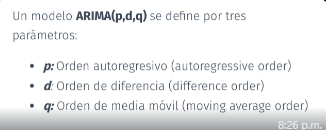

In [84]:
#arima model 
from statsmodels.tsa.arima.model import ARIMA
modelo_y = ARIMA(df.Y3, order=(1, 2, 1))  
resultados_3 = modelo_y.fit() 
print (resultados_3.summary())

                               SARIMAX Results                                
Dep. Variable:                     Y3   No. Observations:                  150
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -419.138
Date:                Sun, 03 Nov 2024   AIC                            844.277
Time:                        20:40:36   BIC                            853.269
Sample:                             0   HQIC                           847.930
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1127      0.094     -1.205      0.228      -0.296       0.071
ma.L1         -0.9995      2.643     -0.378      0.705      -6.179       4.180
sigma2        16.3006     43.012      0.379      0.7

En este aprtado debemos fijarnos>
- Prob(Q) debe ser mayor > 0.05 
- Ljung-Box = los residuos son ruido blanco y ya es estacionaria

In [85]:
# Realizar el test de Ljung-Box para los residuos del modelo ARIMA
#poner python y hacerlo en consola
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resultados_3.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,46.345522,0.000001


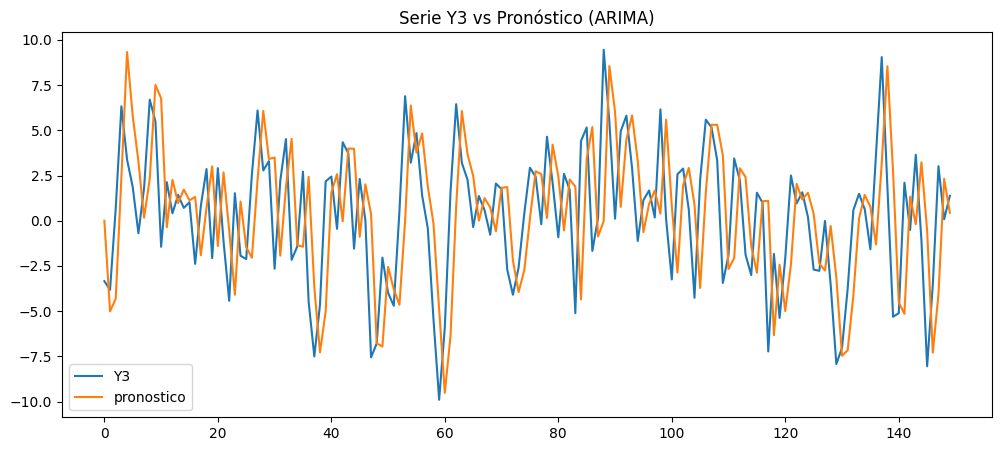

In [86]:
#predicción:  Agregar los valores ajustados y graficar
df['pronostico'] = resultados_3.fittedvalues
df[['Y3', 'pronostico']].plot(figsize=(12, 5), title="Serie Y3 vs Pronóstico (ARIMA)")
plt.show()

----------------

# Y4


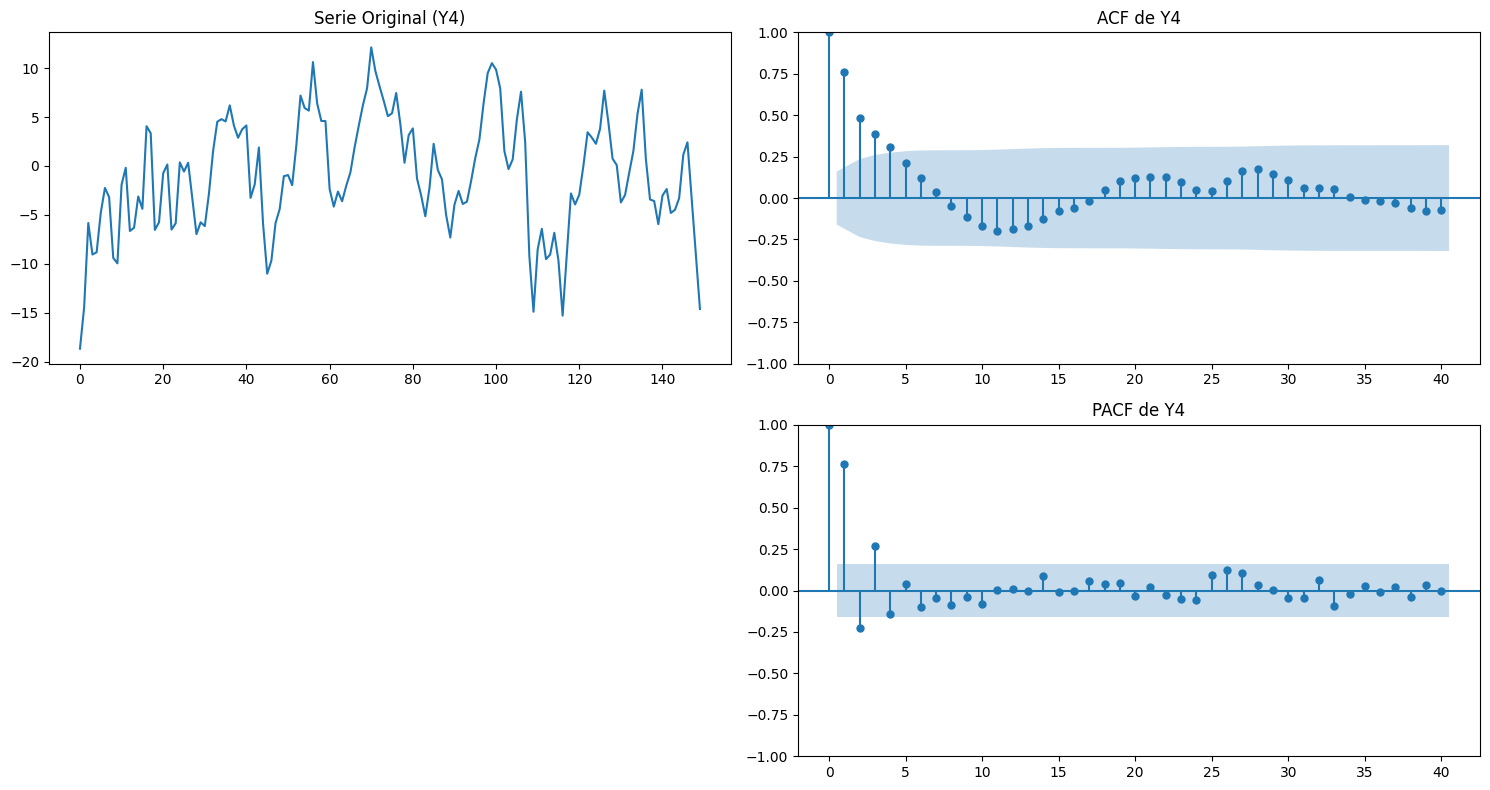

In [87]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Crear una figura para ACF (FACT) y PACF (FACP)
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=False)

# Graficar la serie original
axes[0, 0].plot(df.Y4)
axes[0, 0].set_title('Serie Original (Y4)')

# Graficar ACF
plot_acf(df.Y4, ax=axes[0, 1], lags=40)
axes[0, 1].set_title('ACF de Y4')

# Graficar PACF
plot_pacf(df.Y4, ax=axes[1, 1], lags=40)
axes[1, 1].set_title('PACF de Y4')

# Quitar gráfico vacío
fig.delaxes(axes[1, 0])

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [96]:
#nuevo df Y2
result=adfuller(df.Y4.diff().dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

ADF Statistic: -7.321415
p-value:0.000000


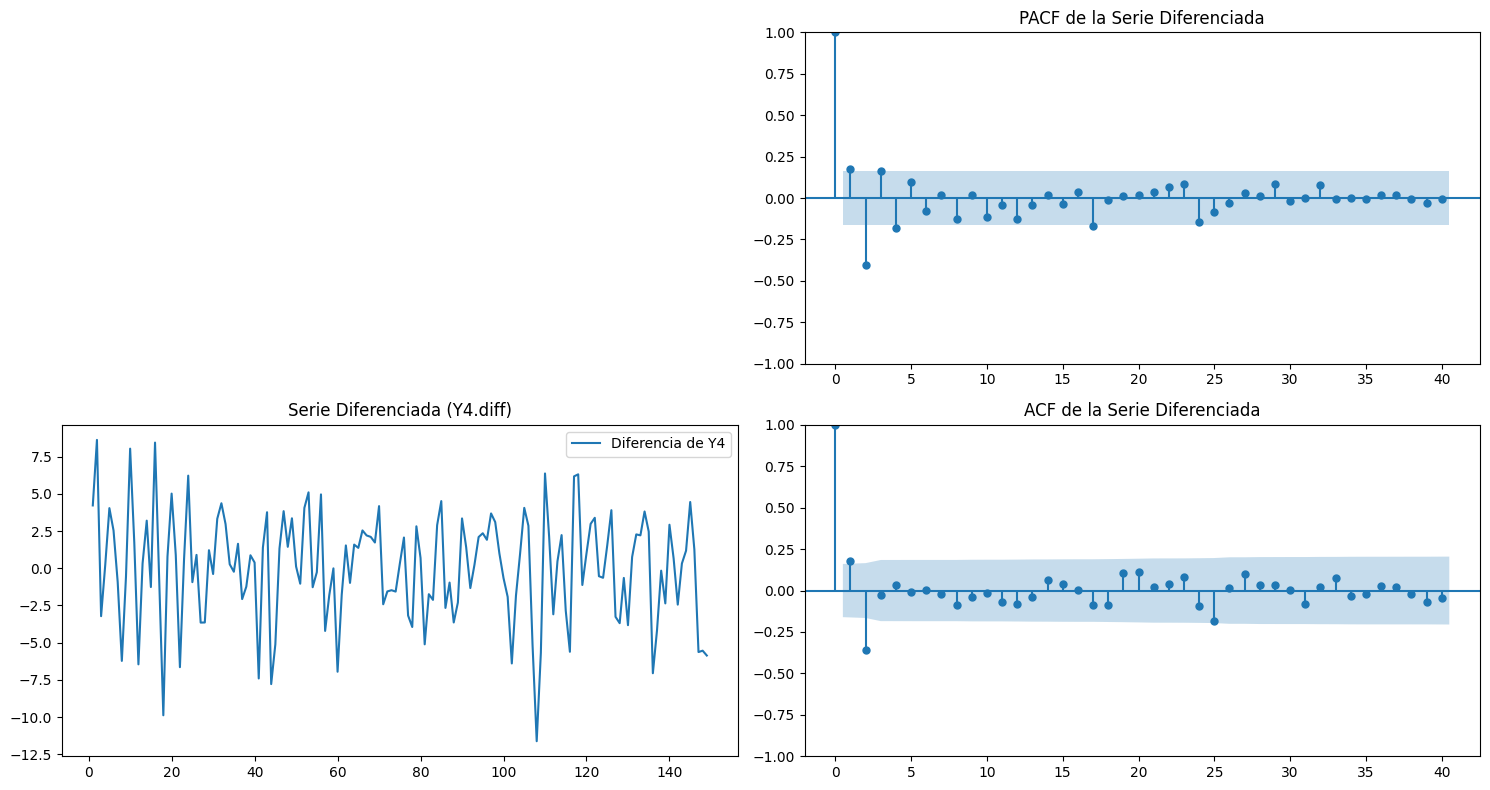

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar la diferencia de la serie original, ACF y PACF
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=False)

# Gráfico de la serie diferenciada
axes[1, 0].plot(df.Y4.diff(), label='Diferencia de Y4')
axes[1, 0].set_title('Serie Diferenciada (Y4.diff)')
axes[1, 0].legend()

# ACF de la serie diferenciada
plot_acf(df.Y4.diff().dropna(), ax=axes[1, 1], lags=40)
axes[1, 1].set_title('ACF de la Serie Diferenciada')

# PACF de la serie diferenciada
plot_pacf(df.Y4.diff().dropna(), ax=axes[0, 1], lags=40)
axes[0, 1].set_title('PACF de la Serie Diferenciada')

# Quitar gráfico vacío
fig.delaxes(axes[0, 0])

# Mostrar los gráficos
plt.tight_layout()
plt.show()

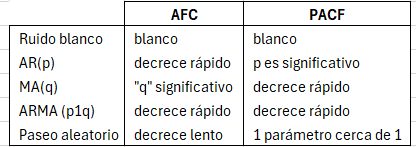

In [101]:
#resultados del modelo ARIMA(1, 1, 1)
from statsmodels.tsa.arima.model import ARIMA
modelo_y = ARIMA(df.Y4, order=(1, 1, 1))
resultados_4 = modelo_y.fit() 
print (resultados_4.summary())

                               SARIMAX Results                                
Dep. Variable:                     Y4   No. Observations:                  150
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -385.453
Date:                Sun, 03 Nov 2024   AIC                            776.906
Time:                        22:12:25   BIC                            785.918
Sample:                             0   HQIC                           780.567
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3578      0.105     -3.407      0.001      -0.564      -0.152
ma.L1          0.8624      0.060     14.464      0.000       0.746       0.979
sigma2        10.2870      1.135      9.067      0.0

 ro = ar.l1 = estimacion de AR de orden 1
1. *L-jung-Box* = No rechazar el contraste, porque la hipotesis nula de este modelo es que los residuos son ruido blanco.
2. *Prob (Q)* = debe ser >0.05 para que no se rechace la hipotesis. Cumple que los residos son ruido blanco ya que en este utima parte la hipotesis es que es ruido blanco

In [102]:
# Realizar el test de Ljung-Box para los residuos del modelo ARIMA
#poner python y hacerlo en consola
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resultados_4.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,11.56463,0.31525


Como p-value es mayor a > 0.05 podemos decir nuestro modelo seleccionado esta correcto.

Si p-value es menor < a 0.05 nuestro modelo esta mal seleccionado

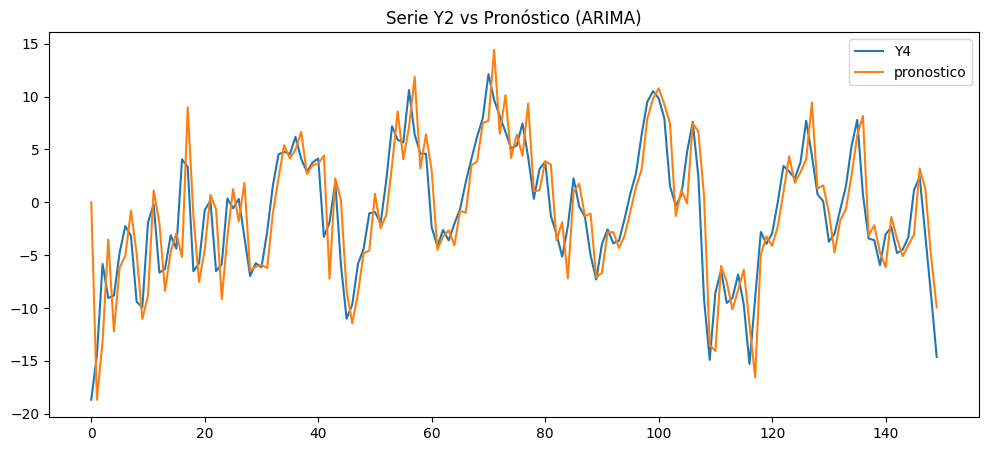

In [103]:
#predicción:  Agregar los valores ajustados y graficar
df['pronostico'] = resultados_4.fittedvalues
df[['Y4', 'pronostico']].plot(figsize=(12, 5), title="Serie Y2 vs Pronóstico (ARIMA)")
plt.show()

------------------

# Y5

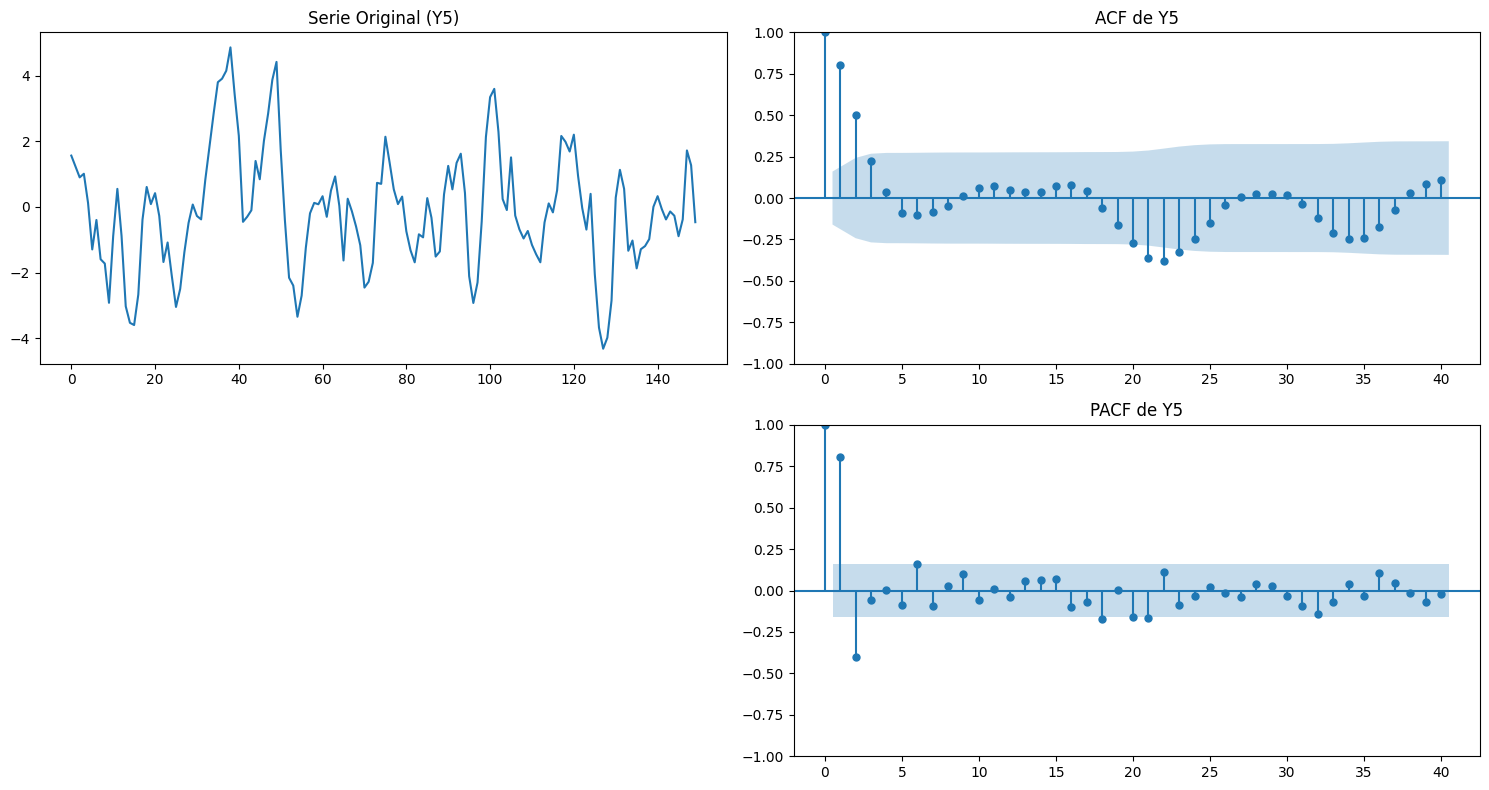

In [104]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Crear una figura para ACF (FACT) y PACF (FACP)
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=False)

# Graficar la serie original
axes[0, 0].plot(df.Y5)
axes[0, 0].set_title('Serie Original (Y5)')

# Graficar ACF
plot_acf(df.Y5, ax=axes[0, 1], lags=40)
axes[0, 1].set_title('ACF de Y5')

# Graficar PACF
plot_pacf(df.Y5, ax=axes[1, 1], lags=40)
axes[1, 1].set_title('PACF de Y5')

# Quitar gráfico vacío
fig.delaxes(axes[1, 0])

# Mostrar los gráficos
plt.tight_layout()
plt.show()

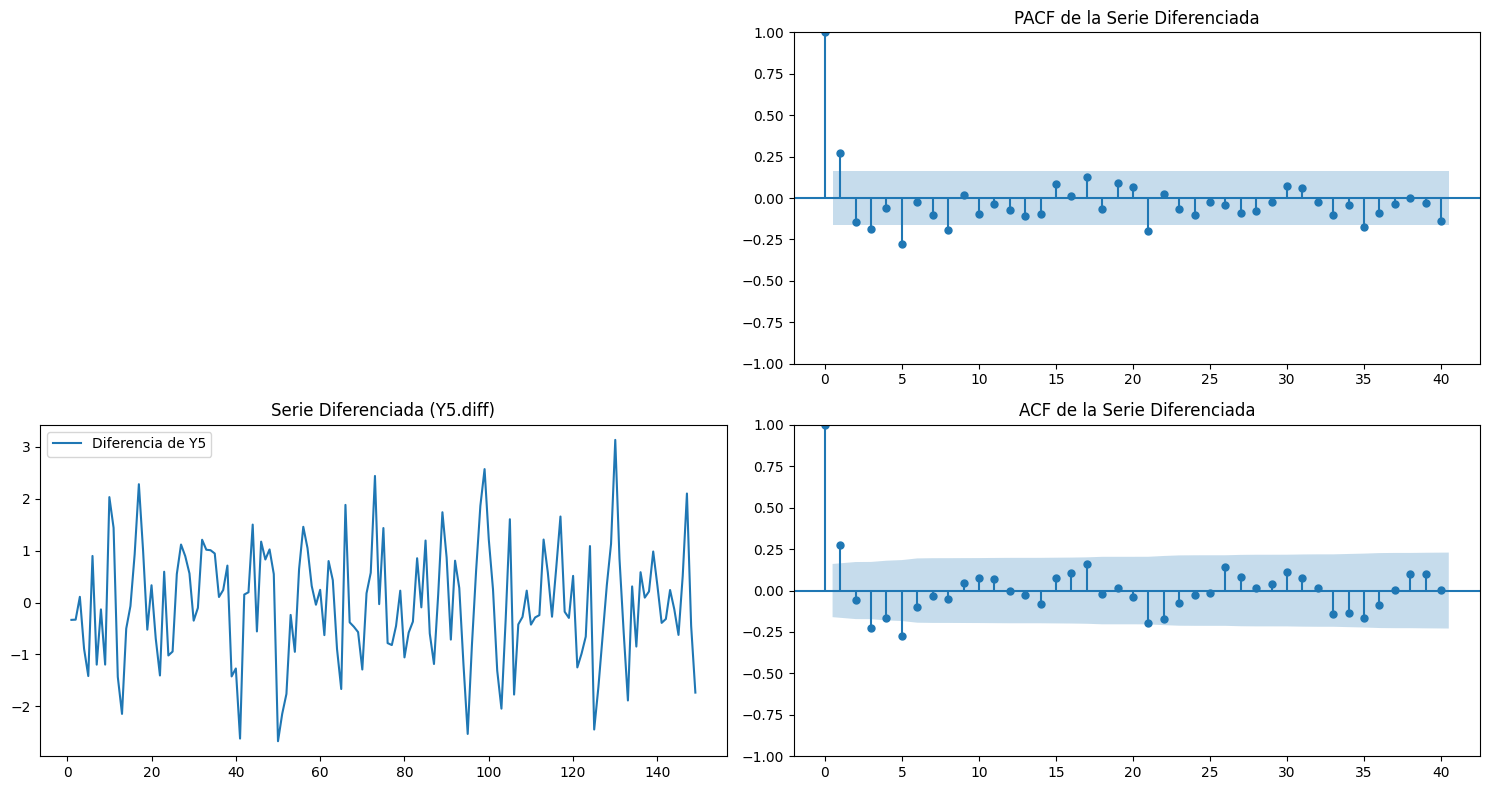

In [106]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar la diferencia de la serie original, ACF y PACF
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=False)

# Gráfico de la serie diferenciada
axes[1, 0].plot(df.Y5.diff(), label='Diferencia de Y5')
axes[1, 0].set_title('Serie Diferenciada (Y5.diff)')
axes[1, 0].legend()

# ACF de la serie diferenciada
plot_acf(df.Y5.diff().dropna(), ax=axes[1, 1], lags=40)
axes[1, 1].set_title('ACF de la Serie Diferenciada')

# PACF de la serie diferenciada
plot_pacf(df.Y5.diff().dropna(), ax=axes[0, 1], lags=40)
axes[0, 1].set_title('PACF de la Serie Diferenciada')

# Quitar gráfico vacío
fig.delaxes(axes[0, 0])

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [108]:
#nuevo df Y2
result=adfuller(df.Y5.diff().dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

ADF Statistic: -6.953592
p-value:0.000000


In [131]:
#arima model (1,1,0)
from statsmodels.tsa.arima.model import ARIMA
modelo_y = ARIMA(df.Y2, order=(1, 0, 1))  
resultados_5 = modelo_y.fit() 
print (resultados_5.summary())

                               SARIMAX Results                                
Dep. Variable:                     Y2   No. Observations:                  150
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -220.579
Date:                Sun, 03 Nov 2024   AIC                            449.157
Time:                        23:03:58   BIC                            461.200
Sample:                             0   HQIC                           454.050
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3995      9.248      0.151      0.880     -16.727      19.526
ar.L1          0.9883      0.011     86.423      0.000       0.966       1.011
ma.L1          0.3764      0.075      5.017      0.0

 ro = ar.l1 = estimacion de AR de orden 1
1. *L-jung-Box* = No rechazar el contraste, porque la hipotesis nula de este modelo es que los residuos son ruido blanco.
2. *Prob (Q)* = debe ser >0.05 para que no se rechace la hipotesis. Cumple que los residos son ruido blanco ya que en este utima parte la hipotesis es que es ruido blanco

In [133]:
# Realizar el test de Ljung-Box para los residuos del modelo ARIMA
#poner python y hacerlo en consola
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resultados_5.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,19.872095,0.030486


Como p-value es mayor a > 0.05 podemos decir nuestro modelo seleccionado esta correcto.

Si p-value es menor < a 0.05 nuestro modelo esta mal seleccionado

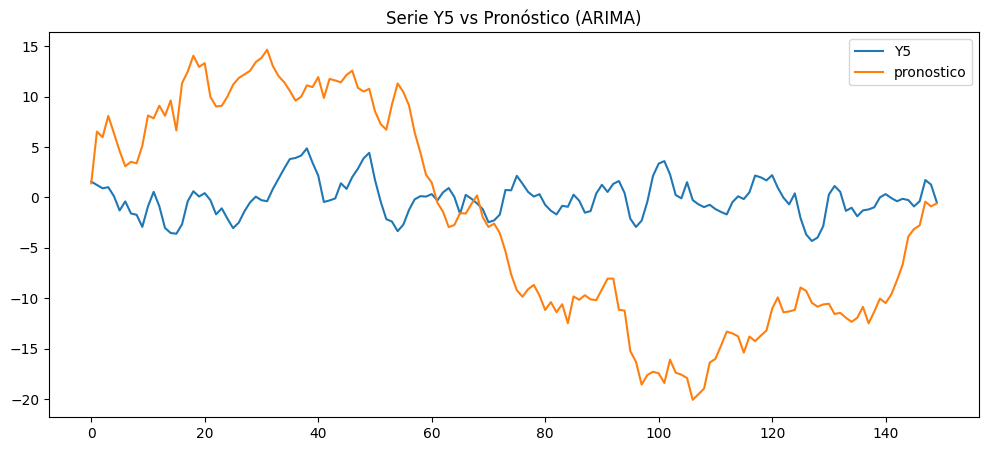

In [135]:
#predicción:  Agregar los valores ajustados y graficar
df['pronostico'] = resultados_5.fittedvalues
df[['Y5', 'pronostico']].plot(figsize=(12, 5), title="Serie Y5 vs Pronóstico (ARIMA)")
plt.show()

----------------------------